I. Import data and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from keras.callbacks import EarlyStopping

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
x_train = train_images/255
y_train = train_labels
x_test= test_images/255
y_test = test_labels

II. Data exploration

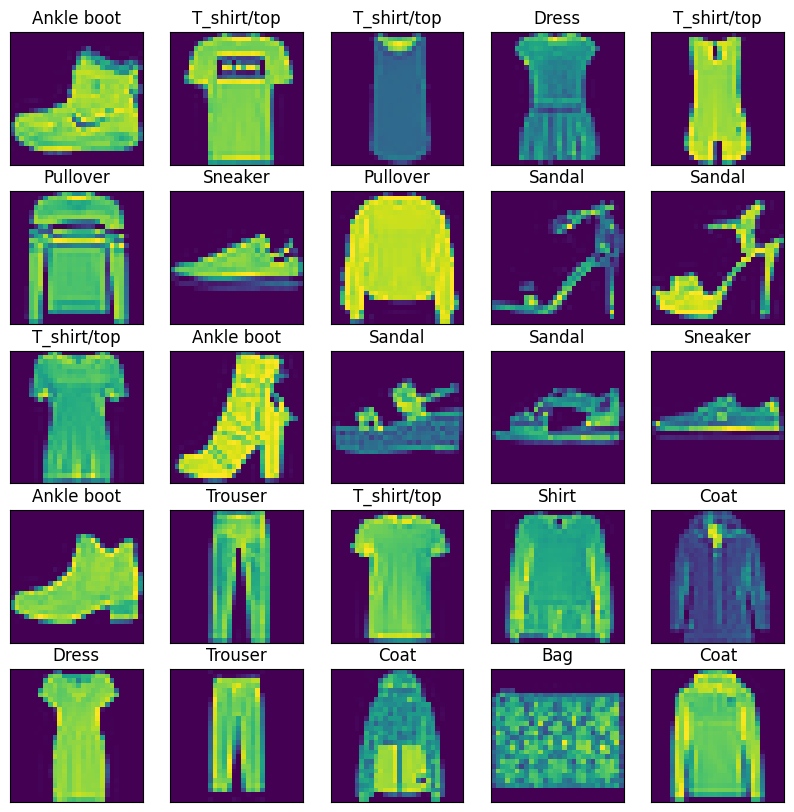

In [ ]:
#Show 25 bức ảnh đầu trong tập x_train
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
a = []
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # L = np.random.randint(0, len(x_train))            #dùng để show 25 bức ảnh ngẫu nhiên trong tập x_train
    # plt.imshow(x_train[L])
    # label_index = int(y_train[L])
    plt.imshow(x_train[i])
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [ ]:
import numpy as np

labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
         5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
   label_counts = np.unique(data, return_counts=True)[1]
   total_samples = len(data)
   for i, count in enumerate(label_counts):
       label = labels[i]
       percent = (count / total_samples) * 100
       print("{:<20s}:  {} or {}%".format(label, count, percent))
get_classes_distribution(y_train)

T-shirt/top         :  6000 or 10.0%
Trouser             :  6000 or 10.0%
Pullover            :  6000 or 10.0%
Dress               :  6000 or 10.0%
Coat                :  6000 or 10.0%
Sandal              :  6000 or 10.0%
Shirt               :  6000 or 10.0%
Sneaker             :  6000 or 10.0%
Bag                 :  6000 or 10.0%
Ankle Boot          :  6000 or 10.0%


In [ ]:
get_classes_distribution(y_test)

T-shirt/top         :  1000 or 10.0%
Trouser             :  1000 or 10.0%
Pullover            :  1000 or 10.0%
Dress               :  1000 or 10.0%
Coat                :  1000 or 10.0%
Sandal              :  1000 or 10.0%
Shirt               :  1000 or 10.0%
Sneaker             :  1000 or 10.0%
Bag                 :  1000 or 10.0%
Ankle Boot          :  1000 or 10.0%


In [ ]:
#Split train in train and validation set
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2,random_state = 12345)

In [ ]:
image_shape = (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [ ]:
print(x_train.shape)

(48000, 28, 28, 1)


III. Build model

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', input_shape = image_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(64 , (3,3) , activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(128 , (3,3), activation = 'relu'),
    Flatten(), # flatten out the layers
    Dense(128,activation='relu'),
    Dense(10,activation = 'softmax')
])
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_14 (Flatten)        (None, 1152)            

IV. Train model

In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=30,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/30
94/94 [==============================] - 3s 16ms/step - loss: 0.7203 - accuracy: 0.7423 - val_loss: 0.4661 - val_accuracy: 0.8339
Epoch 2/30
94/94 [==============================] - 1s 11ms/step - loss: 0.4182 - accuracy: 0.8488 - val_loss: 0.3744 - val_accuracy: 0.8643
Epoch 3/30
94/94 [==============================] - 1s 11ms/step - loss: 0.3472 - accuracy: 0.8752 - val_loss: 0.3301 - val_accuracy: 0.8802
Epoch 4/30
94/94 [==============================] - 1s 11ms/step - loss: 0.3122 - accuracy: 0.8887 - val_loss: 0.3020 - val_accuracy: 0.8934
Epoch 5/30
94/94 [==============================] - 1s 10ms/step - loss: 0.2888 - accuracy: 0.8960 - val_loss: 0.2848 - val_accuracy: 0.8968
Epoch 6/30
94/94 [==============================] - 1s 11ms/step - loss: 0.2710 - accuracy: 0.9005 - val_loss: 0.2687 - val_accuracy: 0.9019
Epoch 7/30
94/94 [==============================] - 1s 10ms/step - loss: 0.2540 - accuracy: 0.9073 - val_loss: 0.2707 - val_accuracy: 0.9052
Epoch 8/30
94

V. Evaluate model

Text(0.5, 1.0, 'Train - Accuracy')

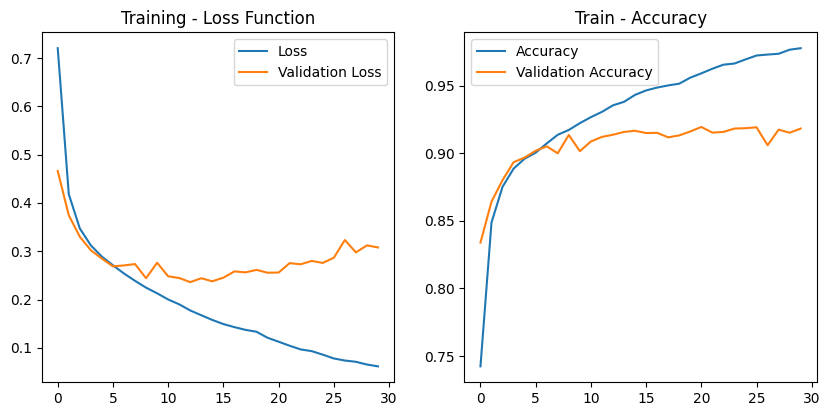

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3572
Test Accuracy : 0.9072


In [ ]:
y_pred = cnn_model.predict(test_images)
predicted_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, predicted_classes)
print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1000
           1       0.89      0.98      0.93      1000
           2       0.84      0.68      0.75      1000
           3       0.92      0.73      0.81      1000
           4       0.62      0.96      0.75      1000
           5       0.92      0.99      0.96      1000
           6       0.68      0.62      0.65      1000
           7       0.97      0.89      0.93      1000
           8       0.95      0.98      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [ ]:
correct = np.nonzero(predicted_classes==y_test)
incorrect = np.nonzero(predicted_classes!=y_test)
print(correct[0].size)
print(len(incorrect[0]))

7508
2492


22


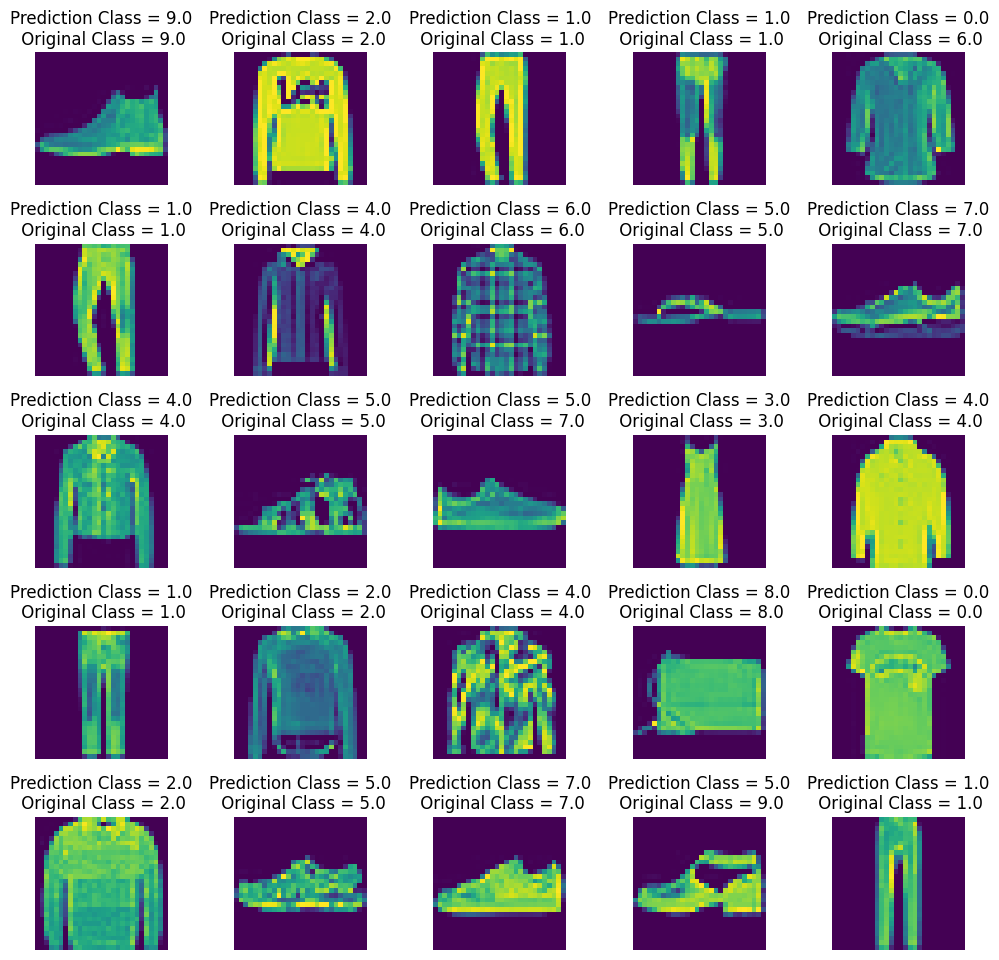

In [ ]:
L = 5
W = 5
count = 0
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    if predicted_classes[i] == y_test[i]:
      count += 1
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
print(count)

VI. Model optimization

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', input_shape = image_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Conv2D(64 , (3,3) , activation = 'relu'),
    MaxPool2D((2,2)),
    Dropout(0.25),
    BatchNormalization(),
    Conv2D(128 , (3,3), activation = 'relu'),
    Dropout(0.3),
    BatchNormalization(),
    Flatten(), # flatten out the layers
    Dense(128,activation='relu'),
    Dropout(0.25),
    Dense(32,activation='relu'),
    Dropout(0.25),
    Dense(10,activation = 'softmax')
])
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_12 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 5, 5, 64)        

In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=50,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/50
188/188 [==============================] - 5s 16ms/step - loss: 0.8543 - accuracy: 0.7012 - val_loss: 0.9734 - val_accuracy: 0.6361
Epoch 2/50
188/188 [==============================] - 2s 12ms/step - loss: 0.5333 - accuracy: 0.8105 - val_loss: 0.5139 - val_accuracy: 0.8204
Epoch 3/50
188/188 [==============================] - 2s 11ms/step - loss: 0.4588 - accuracy: 0.8382 - val_loss: 0.3381 - val_accuracy: 0.8758
Epoch 4/50
188/188 [==============================] - 2s 11ms/step - loss: 0.4106 - accuracy: 0.8557 - val_loss: 0.3068 - val_accuracy: 0.8872
Epoch 5/50
188/188 [==============================] - 2s 11ms/step - loss: 0.3832 - accuracy: 0.8661 - val_loss: 0.2890 - val_accuracy: 0.8942
Epoch 6/50
188/188 [==============================] - 2s 13ms/step - loss: 0.3588 - accuracy: 0.8727 - val_loss: 0.2659 - val_accuracy: 0.9013
Epoch 7/50
188/188 [==============================] - 2s 12ms/step - loss: 0.3434 - accuracy: 0.8781 - val_loss: 0.2736 - val_accuracy: 0.8995

VII. Evaluate model 2

Text(0.5, 1.0, 'Train - Accuracy')

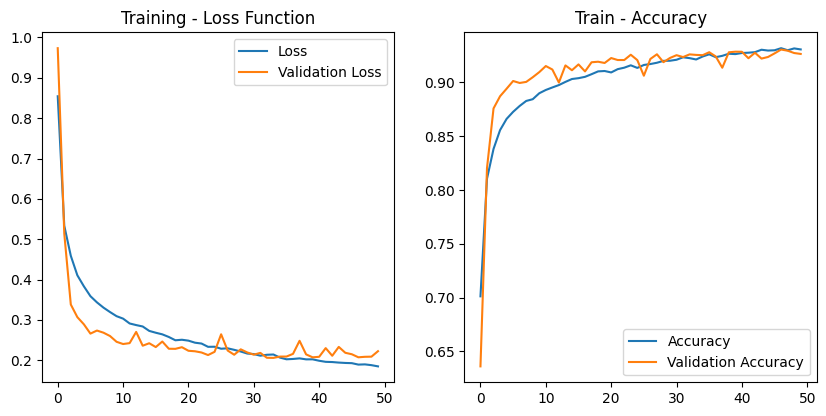

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2615
Test Accuracy : 0.9163


In [ ]:
y_pred = cnn_model.predict(test_images)
predicted_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, predicted_classes)
print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.63      0.74      1000
           1       0.97      0.98      0.97      1000
           2       0.87      0.41      0.56      1000
           3       0.95      0.76      0.84      1000
           4       0.50      0.97      0.66      1000
           5       0.95      0.98      0.96      1000
           6       0.52      0.56      0.54      1000
           7       0.92      0.96      0.94      1000
           8       0.95      0.98      0.96      1000
           9       0.99      0.92      0.95      1000

    accuracy                           0.81     10000
   macro avg       0.85      0.81      0.81     10000
weighted avg       0.85      0.81      0.81     10000



In [ ]:
correct = np.nonzero(predicted_classes==y_test)
incorrect = np.nonzero(predicted_classes!=y_test)
print(correct[0].size)
print(len(incorrect[0]))

8132
1868


23


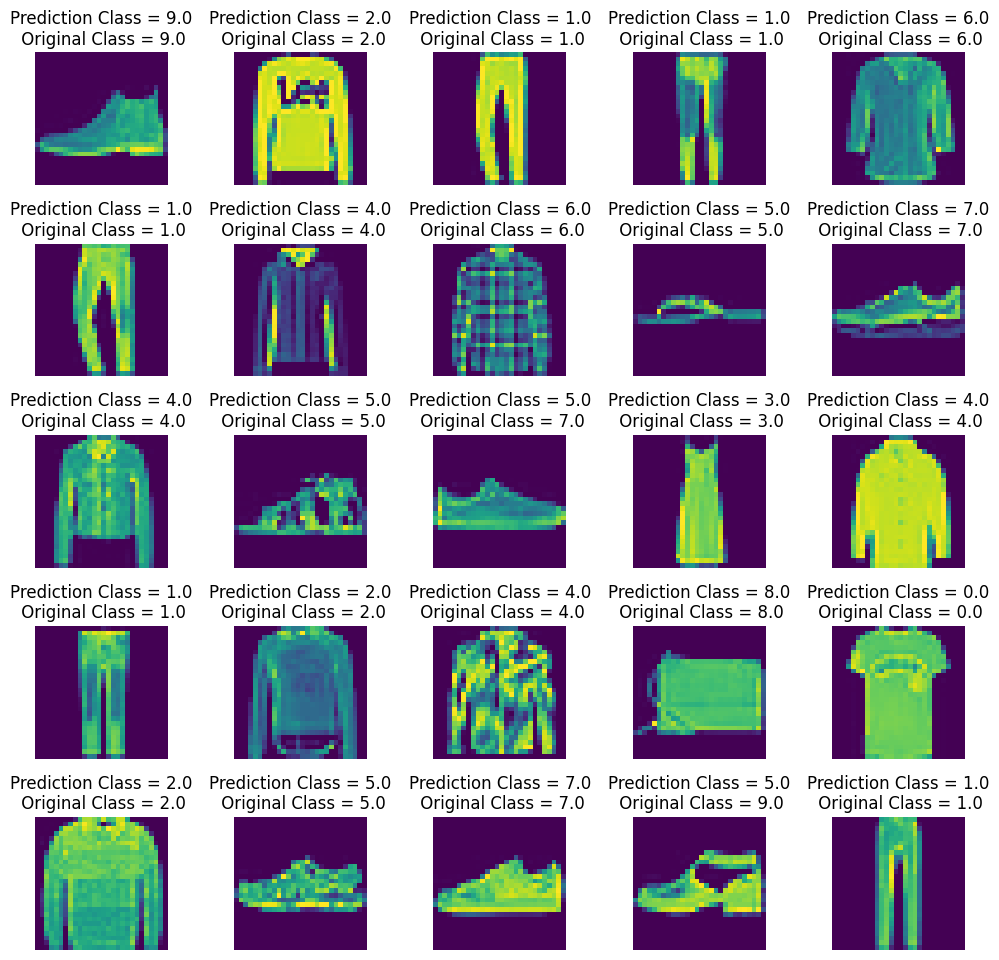

In [ ]:
L = 5
W = 5
count = 0
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    if predicted_classes[i] == y_test[i]:
      count += 1
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
print(count)

In [ ]:
#Save model
#cnn_model.save('my_model.h5')
#cnn_model = tf.keras.models.load_model('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
